<div style="border:solid black 2px; padding: 20px">

# Reviewer's feedback v.1

**Halo Juliman!**
    
**Greetings from Chamdani**

Disini saya akan mereview proyek kamu ya.

Saya akan memberikan beberapa komentar dan feedback seperti dibawah ini, **mohon jangan dipindah, dirubah, maupun dihapus ya :).**
    
> Mohon diperhatikan bahwa apabila ada temuan atau kesalahan yang sama namun tidak ada komentar perbaikan disana, itu berarti kamu masih tetap harus memperbaikinya yaa.

Komentar yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Ada beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan.

</div>

<div style="border:solid gray 5px; padding: 20px" class="alert alert-warning">

**INGATLAH** 
* Project kamu tidak akan bisa diterima bila kamu masih memiliki feedback berwarna merah. 
* Kamu hanya memiliki 3 kali kesempatan iterasi submission disetiap projectnya 
* Kamu dapat memperbaiki dan menyelesaikan feedback **pertama** dari saya tidak lebih dari 1\*24 jam setiap iterasinya. *Untuk membantu saya mengetahui apakah ada kesulitan dari feedback project kamu*
* Jika merasa kesulitan kamu dapat menuliskan responmu atas feedback saya menggunakan blok markdown warna biru yaa.

<div class="alert alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

Siap kak.

</div>

<div style="border:solid black 2px; padding: 20px" class="alert alert-success">
    
# General feedback v.1 *Project Accepted*

Terima kasih banyak telah mengirimkan proyek Anda! 
<br>
    
Secara keseluruhan, proyek Anda **SANGAT** mengesankan. Semoga apa yang kamu pelajari dalam project ini dapat membantu meningkatkan kemampuanmu. Pertahankan apa yang sudah bagus, dan tingkatkan apa yang menurutmu masih perlu ditingkatkan. Semoga berhasil pada project selanjutnya yaa :)

**TETAP SEMANGAT!!**
    
</div>

# Saran Reviewer

# Analisa Penjualan Game di Toko Online Ice

## Deskripsi Proyek
Toko Online Ice menjual video game dari seluruh dunia. Toko ini membutuhkan analisa untuk membuat perencanaan promosi game di tahun 2017.
Analisa dilakukan dengan mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak sehingga toko ini dapat menemukan game yang paling potensial dan kemudian membuat rencana untuk mempromosikannya. 

## Deskripsi Data
Data yang digunakan berasal dari tahun 2016 yang berisi  ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Dataset ini memuat singkatan. ESRB merupakan singkatan dari Entertainment Software Rating Board, yakni sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.
* Name (nama)
* Platform
* Year_of_Release (tahun rilis)
* Genre
* NA_sales (penjualan di Amerika Utara dalam satuan juta USD)
* EU_sales (penjualan di Eropa dalam satuan juta USD)
* JP_sales (penjualan di Jepang dalam satuan juta USD)
* Other_sales (penjualan di negara lainnya dalam satuan juta USD)
* Critic_Score (skor ulasan dari kritikus, maksimal 100)
* User_Score (skor ulasan dari pengguna, maksimal 10)
* Rating (ESRB)

# 1 Tujuan Proyek

Tujuan proyek ini adalah adalah mengidentifikasi pola-pola yang menentukan apakah penjualan suatu game berhasil.

# 2 Hipotesis Proyek
1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
2. Rata-rata rating pengguna genre Action dan Sports berbeda.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 3 Import Library


In [275]:
# Import semua library
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

import warnings
pd.set_option('display.max_column', 100)
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 4 Ikhtisar Data




## 4.1 Menampilkan Informasi Data

In [276]:
# Load data ke dataframe
games = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practicum/Original_Files/05. Data Proyek Kelima/games.csv')

<div class="alert alert-warning">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Tolong sebelum submit project pastikan kamu sudah menjalankan seluruh cell kode project kamu di platform yang sudah disediakan oleh praktikum yaa

</div>

In [277]:
# Menampilkan sampel data
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7305,Crash 'N' Burn,PS2,2004.0,Racing,0.11,0.08,0.00,0.03,63.0,8,T
13012,Disney's PK: Out of the Shadows,GC,2002.0,Platform,0.04,0.01,0.00,0.00,46.0,tbd,E
16655,Summer Athletics,PC,2008.0,Sports,0.00,0.01,0.00,0.00,NaN,tbd,NaN
10954,I-Ninja,GC,2003.0,Platform,0.07,0.02,0.00,0.00,77.0,7.6,T
9517,Destroy All Humans! Path of the Furon,X360,2008.0,Action,0.08,0.04,0.00,0.01,NaN,NaN,NaN
3429,LEGO Indiana Jones 2: The Adventure Continues,PSP,2009.0,Action,0.21,0.23,0.00,0.14,NaN,tbd,E10+
7517,NCAA March Madness 06,XB,2005.0,Sports,0.15,0.04,0.00,0.01,76.0,7.2,E
1197,Dragon Quest Monsters 2,GB,2001.0,Role-Playing,0.00,0.00,1.56,0.00,NaN,NaN,NaN
6954,Jet X20,PS2,NaN,Racing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
12900,Vertigo,Wii,2009.0,Strategy,0.05,0.00,0.00,0.00,66.0,tbd,E


In [278]:
# Menghitung baris dan kolom dataframe
games.shape

(16715, 11)

In [279]:
# Menampilkan informasi data
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [280]:
# Memeriksa nilai yang hilang
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Temuan :
* Nama kolom tidak standar dan harus diubah ke huruf kecil
* Tipe data Years_of_Release sebaiknya integer
* Tipe data User_Score sebaiknya float
* Ada nilai yang hilang pada kolom Name, Year_of_Release, Genre, Critic_Score, User_Score dan Rating.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 4.2 Memeriksa Kolom Kategorik

In [281]:
# Memeriksa Nilai Unik pada kolom 'platform'
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [282]:
# Memeriksa Nilai Unik pada kolom 'genre'
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [283]:
# Memeriksa Nilai Unik pada kolom 'rating'
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

Tidak ada yang aneh pada ketiga kolom numerik diatas

## 4.3 Memeriksa Kolom Numerik

In [284]:
# Menampilkan nilai statistik kolom numerik
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Dari tabel diatas, ditemukan bahwa:
* Tahun penjualan dimulai dari 1980 sampai 2016.
* Pada semua data penjualan, nilai mean lebih besar dari nilai median.
* Hanya 8137 dari 16715 data yang terisi pada kolom critic_score.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 5 Pra-Pemrosesan Data

## 5.1 Mengubah nama kolom

In [285]:
# Mengubah nama kolom menjadi huruf kecil
games.columns = games.columns.str.lower()

In [286]:
# Memeriksa nama kolom kembali
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 5.2 Mengatasi nilai yang hilang dan mengubah tipe data

### 5.2.1 Kolom 'name'




In [287]:
# Memeriksa nilai yang hilang pada kolom name
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Ada 2 nilai yang hilang pada kolom name, keduanya ada di tahun 1993 dan platform GEN, mungkin informasi nama game yang hilang dapat diperoleh dari kedua kolom ini.

In [288]:
# Memeriksa data pada tahun 1993 dan platform GEN
games[(games['year_of_release'] == 1993) & (games['platform'] == "GEN")].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN


Ada berbagai macam nama game dengan platform game GEN di tahun 1993 sehingga nilai yang hilang pada nama tidak dapat ditentukan. Dengan demikian 2 baris ini dihapus.

In [289]:
# Menghapus baris yang hilang pada kolom name
games = games[games['name'].notna()]

In [290]:
# Pemerikasaan ulang nilai yang hilang pada kolom name
games['name'].isna().sum()

0

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### 5.2.2 Kolom 'year_of_release'

In [291]:
# Menghitung jumlah nilai yang hilang pada kolom 'year_of_release'
games['year_of_release'].isna().sum()

269

In [292]:
# Memeriksa nilai yang hilang pada kolom 'year_of_release'
games[games['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Dari dataframe ini, nama game, jenis platform, genre kemungkinan berkaitan dengan tahun rilis (year_of_release). Untuk itu perlu dilakukan pengamatan pada beberapa sampel data.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

**Memeriksa game berdasarakan nama**

In [293]:
# Memeriksa game dengan nama 'Madden NFL 2004'
games[games['name']=='Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [294]:
# Memeriksa game dengan nama 'Madden NFL 2004'
games[games['name']=='FIFA Soccer 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [295]:
# Memeriksa game dengan nama 'LEGO Batman: The Videogame'
games[games['name']=='LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [296]:
# Memeriksa game dengan nama 'wwe Smackdown vs. Raw 2006'
games[games['name']=='wwe Smackdown vs. Raw 2006']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN


In [297]:
# Memeriksa game dengan nama 'Space Invaders'
games[games['name']=='Space Invaders']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


**Memeriksa distribusi tahun rilis berdasarkan platform dan genre**

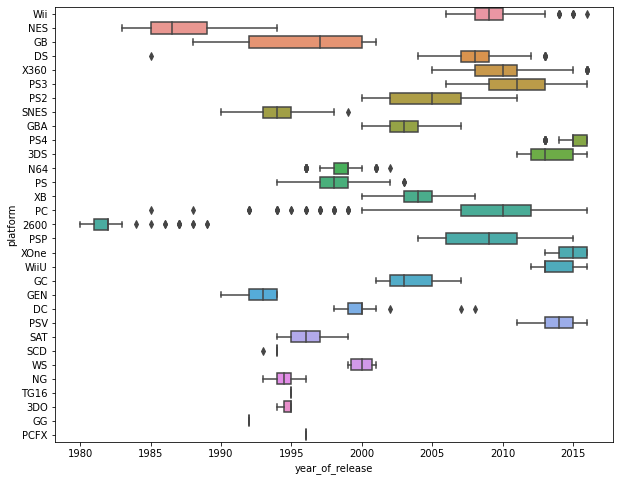

In [298]:
# Grafik tahun rilis dan platform
plt.figure(figsize=(10, 8))
sns.boxplot(data=games, x="year_of_release", y="platform")
plt.show()

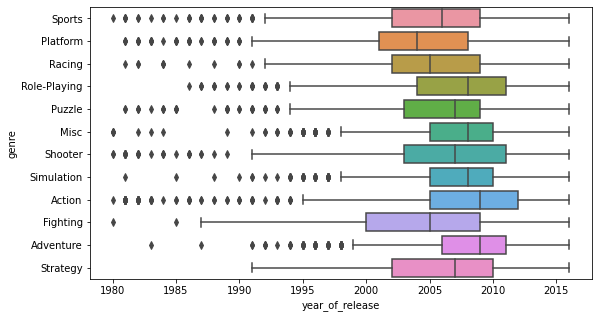

In [299]:
# Grafik tahun rilis dan genre
plt.figure(figsize=(9, 5))
sns.boxplot(data=games, x="year_of_release", y="genre")
plt.show()

Dari hasil pemeriksaan sampel diatas, dapat ditarik kesimpulan sementara :
1. Tahun rilis cenderung sama untuk nama game yang sama.
2. Ada nama game yang sama sekali tidak memiliki tahun rilis, seperti 'wwe Smackdown vs. Raw 2006'
3. Dari grafik tahun rilis dan platform dapat disimpulkan bahwa penggunaan platform ada di rentang tahun tentu dengan outlier yang relatif kecil, trend nya berubah seiring masa dan kemajuan teknologi, sehingga data ini dapat digunakan untuk mengisi nilai yang hilang pada kolom 'year_of_release'.
4. Grafik tahun rilis dan genre, menunjukan bahwa distribusi genre ada di sepanjang tahun dengan outliernya. Data ini tidak cocok untuk mengisi nilai yang hilang di kolom 'year_of_release'.
5. Ada kejanggalan untuk platform DS (Nintendo DS) yang memiliki outlier yang sangat ekstrem di tahun 1985.

Langkah selanjutnya:
1. Mengisi nilai yang hilang dengan median nama game yang sama.
2. Jika masih ada nilai yang hilang, maka nilai yang hilang itu diisi dengan nilai median dari platform yang sama.
3. Menghapus baris sebelum tahun 2004 untuk DS karena platform ini dibuat pada tahun 2004.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [300]:
# Membuat fungsi untuk mengisi nilai yang hilang dengan median
def fill_missing_value_median (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [301]:
# Menjalankan fungsi untuk mengisi nilai yang hilang dengan median berdasarkan nama yang sama.
fill_missing_value_median (games, 'name', 'year_of_release')
games.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13289,Reader Rabbit 2nd Grade,Wii,NaN,Misc,0.04,0.00,0.0,0.00,NaN,tbd,E
5244,Shrek,XB,2001.0,Platform,0.25,0.10,0.0,0.01,49.0,5.4,T
13719,Civilization Beyond Earth: Rising Tide,PC,2015.0,Strategy,0.00,0.04,0.0,0.00,NaN,NaN,NaN


In [302]:
# Pemeriksaan ulang nilai yang hilang
games['year_of_release'].isna().sum()

146

In [303]:
# Menjalankan fungsi untuk mengisi nilai yang hilang dengan median berdasarkan nama yang sama.
fill_missing_value_median (games, 'platform', 'year_of_release')
games.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5000,Battlefield 1,PC,2016.0,Shooter,0.11,0.24,0.00,0.03,88.0,7.6,M
5062,Peppa Pig: The Game,Wii,2009.0,Misc,0.00,0.34,0.00,0.03,NaN,NaN,NaN
15795,Shonen Jump's Yu-Gi-Oh! GX Card Almanac,DS,2008.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN


In [304]:
# Pemeriksaan ulang nilai yang hilang
games['year_of_release'].isna().sum()

0

In [305]:
# Mengubah tipe data untuk kolom year_of_release
games['year_of_release'] = (np.floor((games['year_of_release'].values))).astype('int')

In [306]:
# Memeriksa tipe data kolom year_of_release
games['year_of_release'].dtypes

dtype('int64')

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### 5.2.3 Kolom Score dan Rating


Sebelum mengubah tipe data kolom 'user_score', nilai tba diganti ke nan agar bisa diubah ke tipe data float

In [307]:
# Mengganti nilai 'tbd' menjadi nan
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

In [308]:
# Mengubah tipe data kolom 'user_score' menjadi float
games['user_score'] = games['user_score'].astype('float')

In [309]:
# Memeriksa tipe data pada kolom 'user_score'
games['user_score'].dtypes

dtype('float64')

In [310]:
# Memeriksa sisa nilai yang hilang
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

Tinggal 3 kolom dengan nilai yang hilang yaitu critic_score, user_score dan rating. Kemungkinan 3 kolom ini saling berkaitan, sehingga jika terdapat beberapa baris yang memiliki nilai yang hilang pada ketiga kolom ini.

In [311]:
# Menghitung jumlah baris dengan nilai yang hilang bersamaan pada kolom critic_score, user_score dan rating
missing_value = len(games[(games['critic_score'].isna()) & (games['user_score'].isna()) & (games['rating'].isna())])
percentage = (round(missing_value / len(games),2))*100
print (f'Nilai yang hilang {missing_value} baris')
print (f'Persentasenya sebanyak {percentage} %')

Nilai yang hilang 6665 baris
Persentasenya sebanyak 40.0 %


Ada 6665 baris nilai yang hilang secara bersamaan pada kolom critic_score, user_score dan rating. Nilai ini cukup besar yaitu 40% dari keseluruhan dataframe. Seperti langkah sebelumnya nilai yang hilang pada ketiga kolom ini dapat diisi dengan game yang memiliki nama yang sama, namun untuk rating harus menggunakan modus karena bukan numerik.

In [312]:
# Mengisi nilai yang hilang berdasarkan nama yang sama
games['critic_score'] = games.groupby('name')['critic_score'].transform(
    lambda x: x.fillna(x.median()))
games['user_score'] = games.groupby('name')['user_score'].transform(
    lambda x: x.fillna(x.median()))
games['rating'] = games.groupby('name')['rating'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

In [313]:
# Memeriksa ulang sisa nilai yang hilang
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7615
user_score         8024
rating             6327
dtype: int64

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

Masih ada banyak nilai yang hilang untuk ketiga kolom di atas. Tidak ada cara lain untuk mengisi nilai yang hilang pada ketiga kolom tersebut, namun menjadi catatan untuk analisa selanjutnya.

## 5.3 Menghapus data yang aneh pada platform DS.

In [314]:
# Menampilkan baris pada platform DS yang dirilis sebelum tahun 2004
games[(games['platform'] == 'DS') & (games['year_of_release']<2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


In [315]:
# Menghapus baris pada platform DS yang dirilis sebelum tahun 2004
games.drop(inplace=True, index=15957)

In [316]:
# Memeriksa kembali baris pada platform DS yang dirilis sebelum tahun 2004
games[(games['platform'] == 'DS') & (games['year_of_release']<2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Sudah tidak ada baris dengan platform DS yang dirilis sebelum tahun 2004

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 5.4 Menjumlahkan nilai pendapatan


In [317]:
# Menjumlahkan nilai pendapatan
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [318]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 6 Analisis Data Eksploratif

## 6.1 Game Rilis dari Tahun ke Tahun

Bagian ini menganalisa berapa banyak game yang dirilis dari tahun 1980 sampai 2016

In [319]:
# Urutan tahun rilis terbanyak
games.groupby('year_of_release')['name'].count().sort_values(ascending=False).head(10)

year_of_release
2008    1463
2009    1455
2010    1285
2007    1202
2011    1164
2006    1019
2005     948
2002     844
2003     797
2004     793
Name: name, dtype: int64

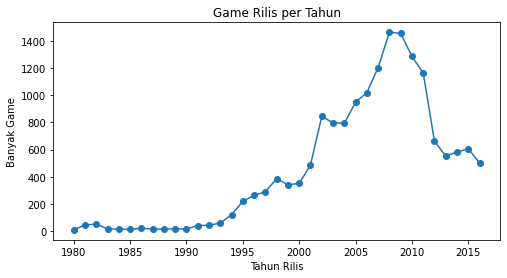

In [320]:
# Menampilkan grafik rilis sepanjang tahun
(pd.pivot_table(games, index=['year_of_release'], values='name', aggfunc=['count']).reset_index()).plot(x= 'year_of_release', style = 'o-', figsize = (8,4), legend = False)
plt.title('Game Rilis per Tahun')
plt.ylabel("Banyak Game")
plt.xlabel("Tahun Rilis")
plt.show()

Temuan:
1. Dari data terlihat game terbanyak dirilis pada tahun 2008, sesuai dengan informasi grafik bahwa puncak ada di sekitar tahun 2007 sampai 2011.
2. Perkembangan game menanjak dari tahun 1993 sampai puncak 2008 dan jatuh sangat rendah di tahun 2015 (hampir setengah tinggi puncak).

Persepsi:
> Pada awal tahun 80an barang elektronik seperti televisi, game console, dan komputer hanya dimiliki orang-orang yang berpenghasilan menengah ke atas. Kemajuan teknologi pembuatan game pada pengembangan platform yang semakin canggih dan murah sehingga membuat pertumbuhan pasar game naik secara signifikan dari tahun 1993 sampai puncaknya di tahun 2008. Perubahan ini dapat dilihat dengan banyaknya online game disertai berbagai kompetisi dan portabilitas perangkat dan lain sebagainya.
Pada tahun 2009 produksi game menurun, mungkin karena game semakin kompleks yang membutuhkan waktu yang lebih lama untuk merilis sebuah game.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 6.2 Penjualan Game dari Tahun ke Tahun

In [321]:
# Urutan penjualan game terbanyak dari tahun ke tahun.
games.groupby('year_of_release')['total_sales'].sum().sort_values(ascending=False).head(10)

year_of_release
2008    683.08
2009    664.19
2007    606.16
2010    600.13
2006    523.40
2011    515.05
2005    460.21
2004    430.17
2002    401.35
2003    371.39
Name: total_sales, dtype: float64

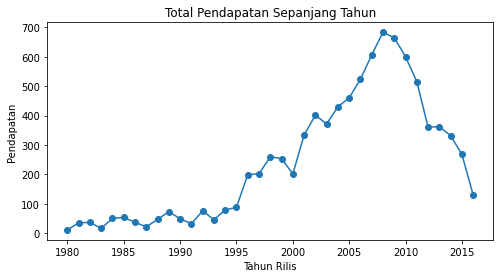

In [322]:
# Menampilkan grafik pendapatan di sepanjang tahun
(pd.pivot_table(games, index=['year_of_release'], values='total_sales', aggfunc=['sum']).reset_index()).plot(x= 'year_of_release', style = 'o-', figsize = (8,4), legend = False)
plt.title('Total Pendapatan Sepanjang Tahun')
plt.ylabel('Pendapatan')
plt.xlabel('Tahun Rilis')
plt.show()

Grafik total pendapatan tahunan menampilkan pola yang sama dengan banyaknya game yang di rilis setiap tahunnya. Tanpa harus menghitung kolerasinya, kedua grafik menunjukan kolerasi yang sangat kuat antara kuantiti dan pendapatan setiap tahunnya.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 6.3 Penjualan per Platform

Untuk mendapatkan analisa yang lebih dalam, data penjualan ini perlu dianalisa pada setiap platform.

In [323]:
# Urutan game berdasarkan penjualan untuk setiap platform
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.10
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

In [324]:
# Jumlah platform game
len(games['platform'].unique())

31

Total platform adalah 31, untuk analisa yang lebih detail diambil 10 penjualan teratas.

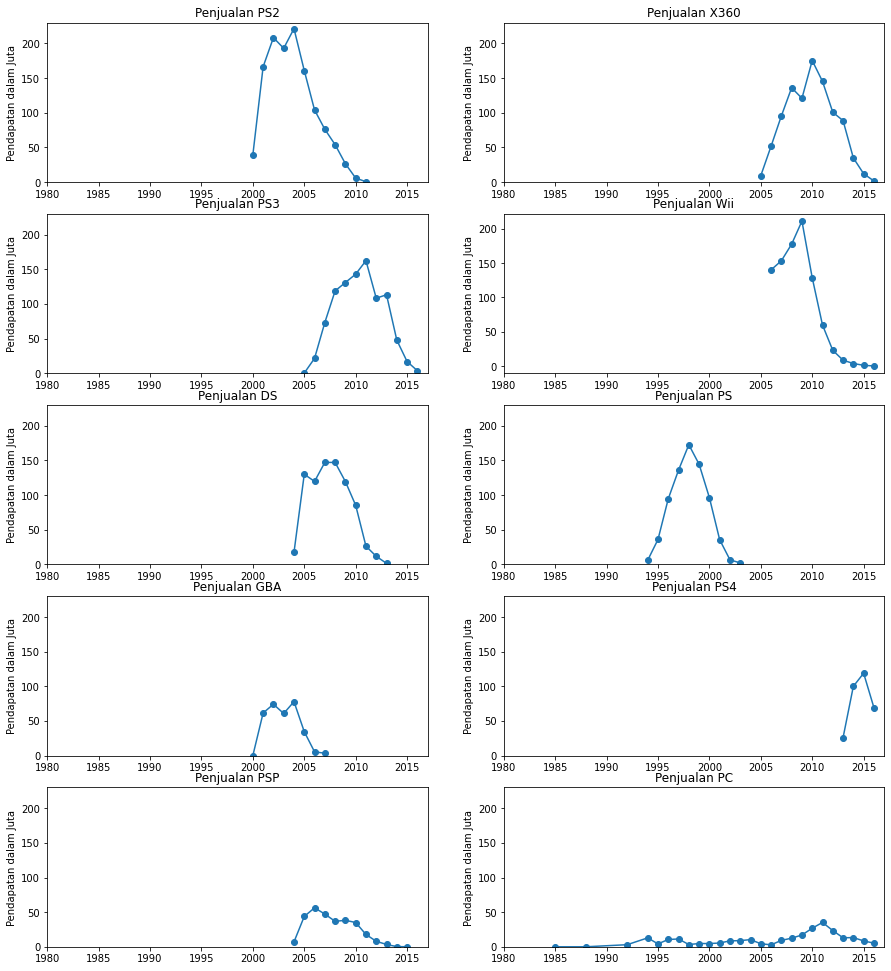

In [325]:
# Menampilkan grafik untuk 10 platform dengan total penjualan terbesar
fig, ((ax1, ax2) , (ax3 , ax4) , (ax5, ax6) , (ax7, ax8) , (ax9 , ax10)) = plt.subplots(5, 2, figsize=(15, 17))
(games[games['platform'] == 'PS2']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Pendapatan dalam Juta')
ax1.set_title('Penjualan PS2')
ax1.set_xlim([1980, 2017])
ax1.set_ylim([0, 230])
ax1.locator_params(integer=True)

(games[games['platform'] == 'X360']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Pendapatan dalam Juta')
ax2.set_title('Penjualan X360')
ax2.set_xlim([1980, 2017])
ax2.set_ylim([0, 230])
ax2.locator_params(integer=True)

(games[games['platform'] == 'PS3']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('Pendapatan dalam Juta')
ax3.set_title('Penjualan PS3')
ax3.set_xlim([1980, 2017])
ax3.set_ylim([0, 230])
ax3.locator_params(integer=True)

(games[games['platform'] == 'Wii']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax4)
ax4.set_xlabel('')
ax4.set_ylabel('Pendapatan dalam Juta')
ax4.set_title('Penjualan Wii')
ax4.set_xlim([1980, 2017])
ax2.set_ylim([0, 230])
ax4.locator_params(integer=True)


(games[games['platform'] == 'DS']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax5)
ax5.set_xlabel('')
ax5.set_ylabel('Pendapatan dalam Juta')
ax5.set_title('Penjualan DS')
ax5.set_xlim([1980, 2017])
ax5.set_ylim([0, 230])
ax5.locator_params(integer=True)

(games[games['platform'] == 'PS']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax6)
ax6.set_xlabel('')
ax6.set_ylabel('Pendapatan dalam Juta')
ax6.set_title('Penjualan PS')
ax6.set_xlim([1980, 2017])
ax6.set_ylim([0, 230])
ax6.locator_params(integer=True)

(games[games['platform'] == 'GBA']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax7)
ax7.set_xlabel('')
ax7.set_ylabel('Pendapatan dalam Juta')
ax7.set_title('Penjualan GBA')
ax7.set_xlim([1980, 2017])
ax7.set_ylim([0, 230])
ax7.locator_params(integer=True)

(games[games['platform'] == 'PS4']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax8)
ax8.set_xlabel('')
ax8.set_ylabel('Pendapatan dalam Juta')
ax8.set_title('Penjualan PS4')
ax8.set_xlim([1980, 2017])
ax8.set_ylim([0, 230])
ax8.locator_params(integer=True)

(games[games['platform'] == 'PSP']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax9)
ax9.set_xlabel('')
ax9.set_ylabel('Pendapatan dalam Juta')
ax9.set_title('Penjualan PSP')
ax9.set_xlim([1980, 2017])
ax9.set_ylim([0, 230])
ax9.locator_params(integer=True)

(games[games['platform'] == 'PC']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax10)
ax10.set_xlabel('')
ax10.set_ylabel('Pendapatan dalam Juta')
ax10.set_title('Penjualan PC')
ax10.set_xlim([1980, 2017])
ax10.set_ylim([0, 230])
ax10.locator_params(integer=True)

plt.show()

Dari data dan grafik diatas dapat di simpulkan bahwa:
* Total penjualan terbesar dari tahun 1980 sampai 2016 ada pada penjualan PS2 sekitar 1,255 juta, disusul oleh X360 sebesar 971 juta  dan PS3 sebear 939 juta. Penjualan terbaik PS2 ada di antara tahun 2001 dan 2005, dengan puncak penjualan di tahun 2004. Penjualan PS2 jatuh ke titik nol pada tahun 2011 yang bersamaan dengan puncak penjualan PS3 sebagai penerus platform ini.
* Penjualan terbaik X360 ada di antara tahun 2008 dan 2011 dengan puncak penjualan di tahun 2010.
* Penjualan terbaik PS3 ada di antara tahun 2008 dan 2013 dengan puncak penjualan di tahun 2011 mengantikan pendahulunya PS2.
* Penjualan terbaik Wii ada di antara tahun 2006 dan 2010 dengan puncak penjualan di tahun 2009.
* Penjualan terbaik DS ada di antara tahun 2005 dan 2009 dengan puncak penjualan di tahun 2007.
* Penjualan terbaik PS ada di antara tahun 1997 dan 1999 dengan puncak penjualan di tahun 1998.
* Penjualan terbaik PSP ada diantara tahun 2001 dan 2005 dengan puncak penjualan di tahun 2004.
* Penjualan terbaik PS4 ada diantara tahun 2014 dan 2015 dengan puncak penjualan di tahun 2015, namun penjualan belum turun jauh dari puncak sampai saat ini. Platform ini tergolong baru dengan penjualan pertama di tahun 2013 dan belum ada platform penerusnya sehingga kemungkinan penjualan PS4 terus berlanjut di tahun 2017.
* Penjualan terbaik PSP ada di antara tahun 2005 dan 2010 dengan puncak di tahun 2006.
* Penjualan terbaik dari PC ada di antara tahun 2010 dan 2012 dengan puncak di tahun 2011. PC merupakan platform yang masa penjualannya paling panjang sampai 30 tahun dan terus berlanjut hingga saat ini.
* Ada sekitar 6 tahun kemunculan platform baru dan platform lama meredup. Berikut ini contoh peralihan dari platform lama dan baru sesuai dengan pengembangnya:
  * PS -> PS2 -> PS3 -> PS4
  * GB -> GBA -> DS -> 3DS
  * GC -> Wii -> WiiU
  * XB -> X360 -> XOne
  * PSP -> PSV
  * SNES -> N64





<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 6.4 Filter Platform Baru

Popularitas platform lama akan selalu digantikan dengan versi terbarunya. Umumnya dalam periode 6 tahun ada generasi terbaru yang menggantikannya dan trend penjualan platform lama mulai menurun. Dengan demikian data difilter untuk 3 tahun terakhir agar mendapatkan platform yang memiliki potensi penjualan yang baik di 2017. Dataframe baru akan difilter untuk 2013 ke atas. Data ini diambil pada tahun 2016, oleh karena itu data tahun 2016 tidak termasuk dalam analisa karena data penjualannya tidak lengkap setahun.

In [326]:
# Filter game 3 tahun terakhir
new_games = games[(games['year_of_release'] >= 2013) & (games['year_of_release'] != 2016) ]

In [327]:
# Menampilkan jumlah baris dan kolom dataframe baru
new_games.shape

(1741, 12)

In [328]:
# Menampilkan jenis platform pada data frame baru
new_games['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [329]:
# Membuat list platform dari dataframe baru
platform_list = ['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP']

In [330]:
# Mencari daftar tahun pertama platform
year_list = []
for platform in platform_list:
    year = games[games['platform'] == platform]['year_of_release'].min()
    year_list.append(year)
year_list

[2005, 2005, 2013, 2000, 2004, 2013, 2012, 2006, 1985, 2011, 2004]

In [331]:
# Menampilkan list platform dan tahun awalnya.
platform_year = pd.DataFrame({
    "Platform": platform_list,
    "start_year": year_list
})

In [332]:
# Mengurutkan platform_year berdasarkan start_year
platform_year.sort_values(by=['start_year'], inplace=True, ignore_index=True)
platform_year

,Platform,start_year
0,PC,1985
1,3DS,2000
2,DS,2004
3,PSP,2004
4,PS3,2005
5,X360,2005
6,Wii,2006
7,PSV,2011
8,WiiU,2012
9,PS4,2013


Pada dataframe baru platform dapat dikelompokan berdasarkan tahun penjualan pertamanya:

* Platform Lama (1985-2006) : PC, 3DS, DS, PSP, PS3, X360, Wii
* Platform Baru (2011-2013) : PSV, WiiU, PS4, XOne

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 6.5 Menghitung trend pendapatan pada platform baru

In [333]:
# Menghitung pendapatan pada platform terbaru dari tahun 2012 sampai 2015
new_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     244.89
PS3     177.83
X360    135.28
XOne    133.17
3DS     128.58
WiiU     60.03
PC       34.81
PSV      29.00
Wii      13.48
PSP       3.74
DS        1.54
Name: total_sales, dtype: float64

Dari data diatas terlihat bahwa 3 platform penjualan terbanyak ada di PS4, PS3 dan X360. Namun kita tidak melihat trend naik atau turun pada setiap platform. Untuk itu perlu ditampilkan grafik untuk setiap platformnya.

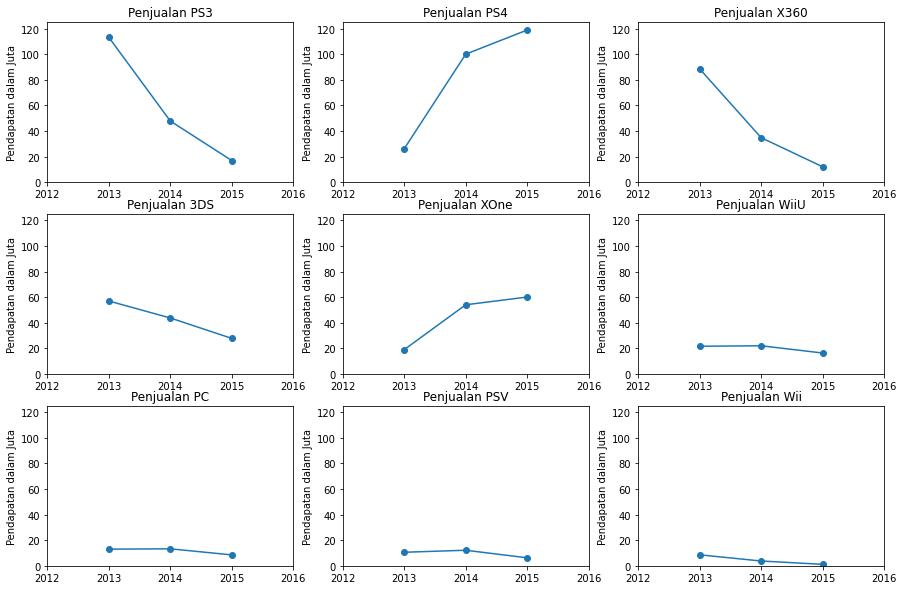

In [334]:
# Menampilkan grafik untuk total penjualan platform per tahun
fig, ((ax1, ax2 , ax3) , (ax4 , ax5, ax6) , (ax7, ax8 , ax9)) = plt.subplots(3, 3, figsize=(15, 10))
(new_games[new_games['platform'] == 'PS3']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Pendapatan dalam Juta')
ax1.set_title('Penjualan PS3')
ax1.set_xlim([2012, 2016])
ax1.set_ylim([0, 125])
ax1.locator_params(integer=True)

(new_games[new_games['platform'] == 'PS4']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Pendapatan dalam Juta')
ax2.set_title('Penjualan PS4')
ax2.set_xlim([2012, 2016])
ax2.set_ylim([0, 125])
ax2.locator_params(integer=True)

(new_games[new_games['platform'] == 'X360']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('Pendapatan dalam Juta')
ax3.set_title('Penjualan X360')
ax3.set_xlim([2012, 2016])
ax3.set_ylim([0, 125])
ax3.locator_params(integer=True)

(new_games[new_games['platform'] == '3DS']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax4)
ax4.set_xlabel('')
ax4.set_ylabel('Pendapatan dalam Juta')
ax4.set_title('Penjualan 3DS')
ax4.set_xlim([2012, 2016])
ax4.set_ylim([0, 125])
ax4.locator_params(integer=True)


(new_games[new_games['platform'] == 'XOne']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax5)
ax5.set_xlabel('')
ax5.set_ylabel('Pendapatan dalam Juta')
ax5.set_title('Penjualan XOne')
ax5.set_xlim([2012, 2016])
ax5.set_ylim([0, 125])
ax5.locator_params(integer=True)

(new_games[new_games['platform'] == 'WiiU']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax6)
ax6.set_xlabel('')
ax6.set_ylabel('Pendapatan dalam Juta')
ax6.set_title('Penjualan WiiU')
ax6.set_xlim([2012, 2016])
ax6.set_ylim([0, 125])
ax6.locator_params(integer=True)

(new_games[new_games['platform'] == 'PC']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax7)
ax7.set_xlabel('')
ax7.set_ylabel('Pendapatan dalam Juta')
ax7.set_title('Penjualan PC')
ax7.set_xlim([2012, 2016])
ax7.set_ylim([0, 125])
ax7.locator_params(integer=True)

(new_games[new_games['platform'] == 'PSV']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax8)
ax8.set_xlabel('')
ax8.set_ylabel('Pendapatan dalam Juta')
ax8.set_title('Penjualan PSV')
ax8.set_xlim([2012, 2016])
ax8.set_ylim([0, 125])
ax8.locator_params(integer=True)

(new_games[new_games['platform'] == 'Wii']).groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='o-', ax=ax9)
ax9.set_xlabel('')
ax9.set_ylabel('Pendapatan dalam Juta')
ax9.set_title('Penjualan Wii')
ax9.set_xlim([2012, 2016])
ax9.set_ylim([0, 125])
ax9.locator_params(integer=True)

plt.show()

Dari grafik dapat disimpulkan sebagai berikut:
* Hanya 2 platform dengan trend naik yaitu PS4 dan Xone yang penjualan keduanya dimulai di tahun 2013. Penjualan games pada platform ini sangat berpotensi untuk menghasilkan keuntungan di masa depan.
* Walaupun PS3 dan X360 memiliki total penjualan yang sangat besar namun trend penjualannya telah menurun secara signifikan. Grafik penjualan platform lama PS3, X360, 3DS, Wii, dan PC yang kebanyakan diantaranya memiliki penjualan yang bagus dimasanya namun mengalami penurunan yang drastis di tahun 2015. Penjualan platform lama ini kurang berpotensi menghasilkan keuntungan di masa depan.
* Penjualan platform seperti PSV dan WiiU tidak begitu besar padahal tergolong baru, masing-masing dimulai pada tahun 2011 dan 2012. Penjualan games pada platform ini kurang berpotensi menghasilkan keuntungan di masa depan.


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 6.6 Boxplot Penjualan Global Semua Platform

Sebelum membuat boxplot Penjualan Global, data diurutkan agar mudah dianalisa secara visual. Berikut langkah-langkah yang akan dilakukan:
1. Mengelompokan penjualan game berdasarkan platform dan tahun rilis.
2. Membuat urutan platform dari penjualan terbesar
3. Menampilkan boxplot penjualan global semua platform

In [335]:
# Membuat Penjualan Global berdasarkan Platform dan Tahun Rilis
grouped = new_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_values().reset_index()
grouped.head()

,platform,year_of_release,total_sales
0,PSP,2015,0.12
1,PSP,2014,0.24
2,Wii,2015,1.14
3,DS,2013,1.54
4,PSP,2013,3.38


In [336]:
# Membuat urutan penjualan game berdasarkan platform dari terkecil sampai terbesar
ordered = grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
ordered

0       DS
1      PSP
2      Wii
3      PSV
4       PC
5     WiiU
6      3DS
7     XOne
8     X360
9      PS3
10     PS4
Name: platform, dtype: object

In [337]:
# Menampilkan Statistik Penjualan
grouped.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,3.0,42.860000,14.650747,27.78,35.770,43.76,50.400,57.04
DS,1.0,1.540000,NaN,1.54,1.540,1.54,1.540,1.54
PC,3.0,11.603333,2.673655,8.52,10.765,13.01,13.145,13.28
PS3,3.0,59.276667,49.235774,16.82,32.290,47.76,80.505,113.25
PS4,3.0,81.630000,49.103561,25.99,62.995,100.00,109.450,118.90
PSP,3.0,1.246667,1.848495,0.12,0.180,0.24,1.810,3.38
PSV,3.0,9.666667,3.061280,6.25,8.420,10.59,11.375,12.16
Wii,3.0,4.493333,3.780216,1.14,2.445,3.75,6.170,8.59
WiiU,3.0,20.010000,3.175343,16.35,19.000,21.65,21.840,22.03


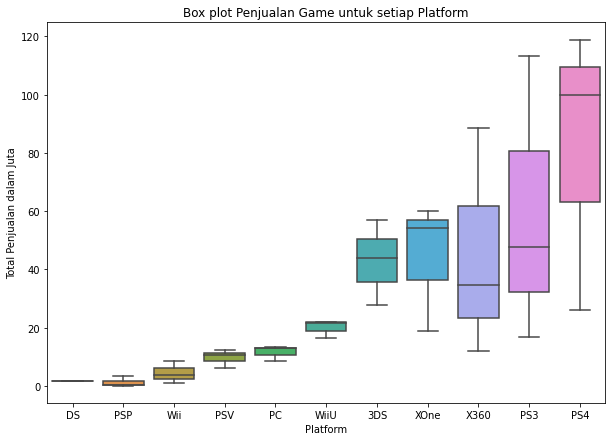

In [338]:
# Menampilkan boxplot penjualan game berdasarkan platform
plt.figure(figsize=(10,7))
sns.boxplot(x='platform', y='total_sales', data=grouped, order=ordered)
plt.title('Box plot Penjualan Game untuk setiap Platform')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan dalam Juta');

Dari grafik boxplot diatas dapat diambil kesimpulan bahwa:
* PS4 memiliki total pendapatan rata-rata tertinggi yang diikuti oleh PS3 dan X360.
* PS4 memiliki median pendapatan tertinggi yang dikuti oleh XOne dan PS3.
* Seperti analisa sebelumnya, walaupun PS3 dan X360 memiliki pendapatan yang besar, namun trend telah menurun sehingga PS4 dan XOne merupakan platform yang lebih menjanjikan untuk penjualan di tahun 2017.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 6.7 Pengaruh Kritik Profesional dan Ulasan Pengguna terhadap Penjualan

Berikut ini adalah analisa pengaruh kritik dan ulasan pengguna terhadap penjualan. Game pada platform PS4 berpotensi untuk penjualan yang baik di masa depan, maka platform ini dipilih untuk menganalisa pengaruh kritik dan ulasan pada penjualan

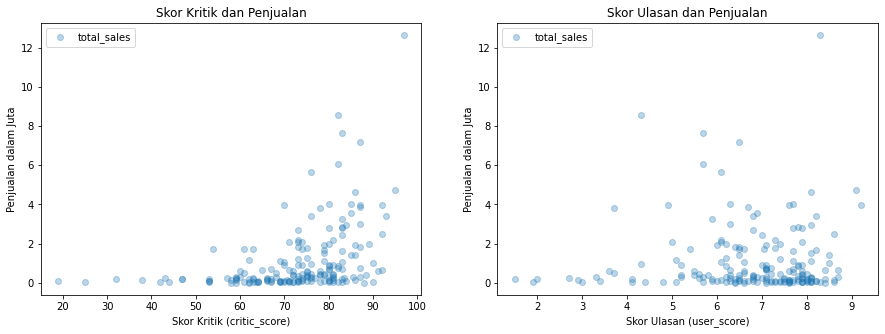

In [339]:
# Menampilkan grafik scatter plot antara penjualan dengan kritik profesional dan ulasan pengguna pada platform PS4
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
new_games[(new_games['platform'] == "PS4") & (new_games['critic_score'].notnull())].plot(x='critic_score', y='total_sales', style='o', alpha=0.3, ax=ax1)
ax1.set_title('Skor Kritik dan Penjualan')
ax1.set_ylabel('Penjualan dalam Juta')
ax1.set_xlabel('Skor Kritik (critic_score)')

new_games[(new_games['platform'] == "PS4") & (new_games['user_score'].notnull())].plot(x='user_score', y='total_sales', style='o', alpha=0.3, ax=ax2)
ax2.set_title('Skor Ulasan dan Penjualan')
ax2.set_ylabel('Penjualan dalam Juta')
ax2.set_xlabel('Skor Ulasan (user_score)')

plt.show()

Grafik di atas menunjukan korelasi positif antara kritik dan penjualan serta korelasi yang lemah antara ulasan pengguna dan penjualan.

In [340]:
# Menampilkan korelasi antara penjualan dengan kritik profesional dan ulasan pengguna pada platform PS4
new_games.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.615894,0.404392
user_score,0.615894,1.000000,0.022759
total_sales,0.404392,0.022759,1.000000


Seperti pada grafik, tabel di atas menunjukan korelasi positif terhadap penjualan sekitar 0.404 sedangkan korelasi yang lemah sekitar 0.022 antara ulasan pengguna dan penjualan. Mungkin kritik Profesional mempengaruhi banyak pengguna untuk membeli game yang telah direview sehingga mendongkrak penjualan. Tapi ulasan pengguna terhadap game mungkin bervariasi yang ditunjukan lemahnya korelasi antara ulasan dan penjualan.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 6.8 Penjualan Game dengan Platform yang Berbeda

Sesuai dengan analisa sebelumnya PS4 merupakan platform unggul dalam penjualan game. Namun apakah game PS4 yang ada di platform lain memiliki penjualan yang bagus juga?

In [341]:
# Mencari 5 game dengan total penjualan tertinggi di platform PS4
new_games.query('platform == "PS4"').groupby('name')['total_sales'].sum().sort_values(ascending=False).head()

name
Call of Duty: Black Ops 3         14.63
Grand Theft Auto V                12.62
FIFA 16                            8.58
Star Wars Battlefront (2015)       7.98
Call of Duty: Advanced Warfare     7.66
Name: total_sales, dtype: float64

In [342]:
# Menampilkan penjualan untuk untuk game Call of Duty: Black Ops 3  di platform lain
new_games.query('name == "Call of Duty: Black Ops 3"').groupby('platform')['total_sales'].sum()

platform
PC       0.26
PS3      1.69
PS4     14.63
X360     1.70
XOne     7.39
Name: total_sales, dtype: float64

In [343]:
# Menampilkan penjualan untuk untuk game Grand Theft Auto V di platform lain
new_games.query('name == "Grand Theft Auto V"').groupby('platform')['total_sales'].sum()

platform
PC       1.17
PS3     21.05
PS4     12.62
X360    16.27
XOne     5.47
Name: total_sales, dtype: float64

In [344]:
# Menampilkan penjualan untuk untuk game FIFA 16  di platform lain
new_games.query('name == "FIFA 16"').groupby('platform')['total_sales'].sum()

platform
PC      0.20
PS3     2.70
PS4     8.58
X360    1.57
XOne    3.25
Name: total_sales, dtype: float64

Dari ketiga game yang dianalisa distribusi penjualan tidak sama untuk setiap platform, berikut ini temuan yang didapat:
* **Call of Duty**: Black Ops 3, penjualan terbanyak berturut-turut ada di PS4 dan XOne, sedangkan ada sedikit penjualan untuk platform PC, PS3, dan X360.
* **Grand Theft Auto V**, penjualan terbanyak berturut-turut ada di PS3, X360 dan PS4, sedangkan sedikit penjualan untuk XOne dan PC.
* **FIFA 16**, penjualan terbanyak ada di PS4, dan ada sedikit penjualan di platform lainnya.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 6.9 Penjualan berdasarkan Genre

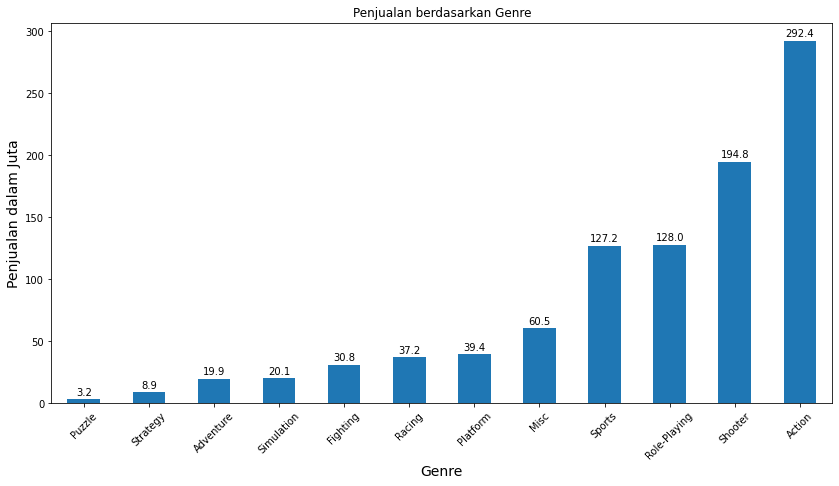

In [345]:
# Menampilkan grafik penjualan berdasarkan Genre
plt.figure(figsize=(14, 7))
splot=new_games.groupby('genre')['total_sales'].sum().sort_values().plot(kind='bar', title='Penjualan berdasarkan Genre')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 7), 
                   textcoords = 'offset points')
plt.xticks(rotation=45)
plt.xlabel('Genre', size=14)
plt.ylabel('Penjualan dalam Juta', size=14)
plt.show()

Penjualan game terbesar dari video game berasal dari genre **action** diikuti oleh **shooter** dan **role-playing**, sedangkan penjualan terendah **puzzle**, **strategy** dan **adventure**. Namun data ini adalah data penjualan global, yang mungkin berbeda untuk setiap wilayah.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 6.10 Game dan Wilayah

### 6.10.1 Pendapatan Wilayah berdasarkan Platform

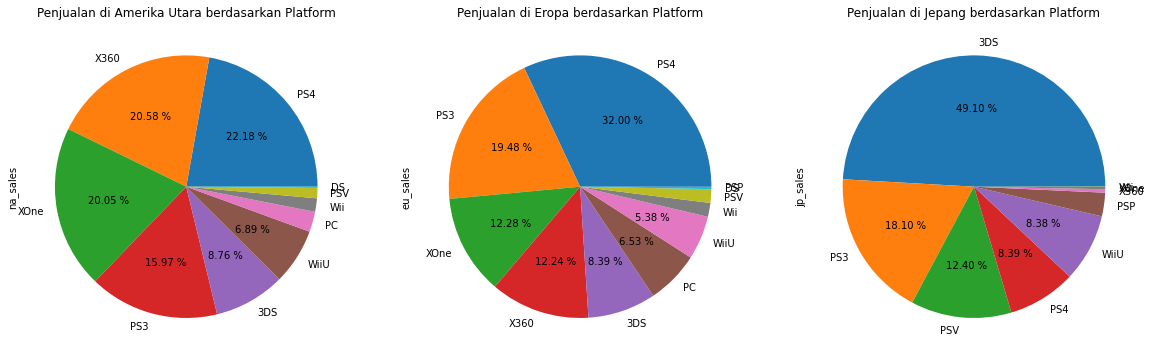

In [346]:
# Menampilkan pendapatan wilayah berdasarkan platform
plt.figure(figsize=(20, 30))

def show_pct(pct):
    return "{:.2f} %".format(pct) if pct > 5 else ''

plt.subplot(3,3,1)
plt.title('Penjualan di Amerika Utara berdasarkan Platform')
new_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot.pie(autopct=show_pct)

plt.subplot(3,3,2)
plt.title('Penjualan di Eropa berdasarkan Platform')
new_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot.pie(autopct=show_pct)

plt.subplot(3,3,3)
plt.title('Penjualan di Jepang berdasarkan Platform')
new_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot.pie(autopct=show_pct)

plt.show()

Dari grafik dapat ditarik kesimpulan sebagai berikut:
* Di Amerika Utara, **PS4**, **X360** dan **XOne** menguasai penjualan dengan selisih tipis masing-masing 22.18 %, 20.58 %, dan 20.05 %. Selanjutnya diikuti oleh platform **PS3** dan **3DS** dengan persentase 15.97 % dan 8.76 % dari total penjualan.
* Di Eropa, **PS4** memiliki penjualan terbesar dengan persentase 32 % dikuti oleh **PS3**, **XOne**, **X360** dan **3DS** yang persentase penjualannya sebesar 19.48 %, 12.28 %, 12.24 %, dan 8.29 %.
* Di Jepang, **3DS** mendominasi dengan hampir setengah penjualan yaitu 49.10 %, diikuti oleh **PS3**, **PSV**, **PS4**, **WiiU** dengan persentase 18.10 %, 12.40%, 8.39 % dan 8.38 %. Menarik bahwa PS4 tidak menempati posisi pertama seperti di kedua wilayah yang lain. 

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### 6.10.1 Pendapatan Wilayah berdasarkan Genre

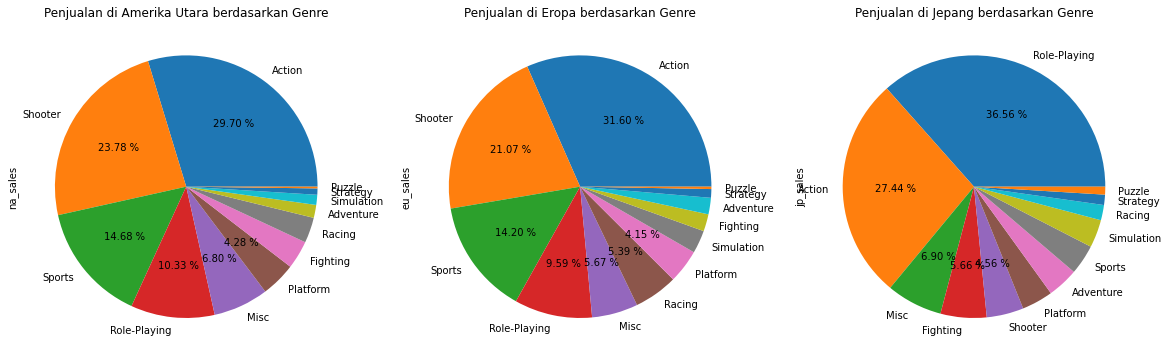

In [347]:
# Menampilkan pendapatan wilayah berdasarkan genre
plt.figure(figsize=(20, 30))

def show_pct(pct):
    return "{:.2f} %".format(pct) if pct > 4 else ''

plt.subplot(3,3,1)
plt.title('Penjualan di Amerika Utara berdasarkan Genre')
new_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot.pie(autopct=show_pct)

plt.subplot(3,3,2)
plt.title('Penjualan di Eropa berdasarkan Genre')
new_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot.pie(autopct=show_pct)

plt.subplot(3,3,3)
plt.title('Penjualan di Jepang berdasarkan Genre')
new_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot.pie(autopct=show_pct)

plt.show()

Dari grafik dapat diambil kesimpulan sebagai berikut:
* Di Amerika Utara, game dengan genre **action** memiliki penjualan terbesar sekitar 29.70 % diikuti oleh **shooter**, **sports**, **role-playing**, dan **misc** (Campuran) dengan persentase masing-masing 23.78 %, 14.68 %, 14.68 %, dan 10.33 %.
* Di Eropa, game dengan genre **action** menguasai penjualan dengan persentase sebesar 31.60 % diikuti oleh **shooter**, **sports**, **role-playing** dan **misc** dengan persentase penjualan masing-masing 21.07 %, 14.20 %, 9.59 %, dan 5.67 %.
* Di Jepang, berbeda dengan kedua wilayah lainnya posisi pertama ditempati oleh **role-playing** dikuti **action**, **misc**, **fighting**, **shooter** dengan persentase penjualan masing-masing 36.56 %, 27.44 %, 6.90 %, 5.66 %, dan 4.56% 

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### 6.10.1 Pendapatan Wilayah berdasarkan ESRB Rating

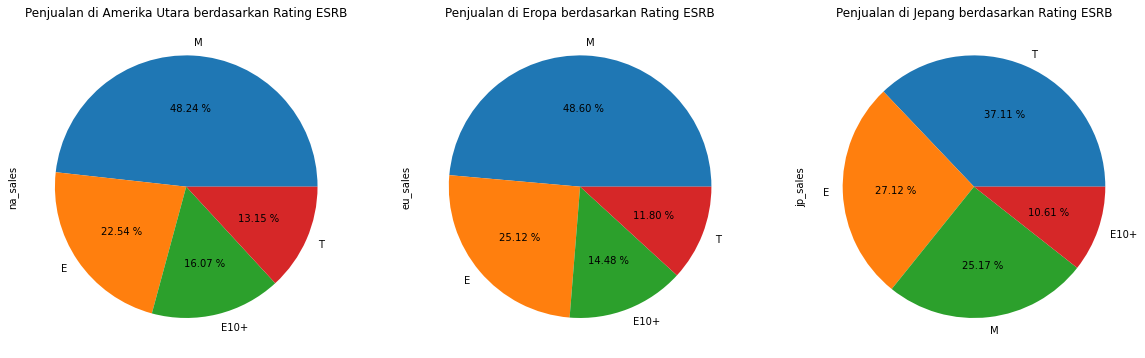

In [348]:
# Menampilkan pendapatan wilayah berdasarkan ESRB Rating
plt.figure(figsize=(20, 30))

def show_pct(pct):
    return "{:.2f} %".format(pct) if pct > 5 else ''

plt.subplot(3,3,1)
plt.title('Penjualan di Amerika Utara berdasarkan Rating ESRB')
new_games.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot.pie(autopct=show_pct)

plt.subplot(3,3,2)
plt.title('Penjualan di Eropa berdasarkan Rating ESRB')
new_games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot.pie(autopct=show_pct)

plt.subplot(3,3,3)
plt.title('Penjualan di Jepang berdasarkan Rating ESRB')
new_games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot.pie(autopct=show_pct)

plt.show()

Berikut ini daftar ESRB Rating:
* E = Everyone
* M = Mature 17+
* T = Teen 13+
* E10+ = Everyone 10+
* K-A = Kids to Adults 6+
* AO + Adults Only 18+
* EC = Early Childhood 3+
* RP = Rating Pending

Dari grafik dapat diambil kesimpulan sebagai berikut:
* Penjualan game berdasarkan ESRB Rating di Amerika Utara dan Eropa relatif sama didomininasi hampir setengah penjualan oleh rating M sekitar 48.24 %, diikuti oleh rating E, E10+, dan T.
* Berbeda dengan penjualan game di Jepang, rating T menguasai penjualan sekitar 37.11 % dikuti oleh rating E, M, dan E10+.
* Perbedaan ini dapat dijadikan acuan untuk promosi untuk setiap wilayah.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 7 Uji Hipotesis

Ada dua hipotesis yang akan diuji yaitu:
1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
2. Rata-rata rating pengguna genre Action dan Sports berbeda.

In [369]:
# Membuat Fungsi untuk pengambilan keputusan hipotesis
def verdict(p_value, alpha=0.05):
    print(f'P-Value: {p_value * 100}%')
    if p_value < alpha:
        print('H1 Accepted / H0 Rejected')
    else:
        print('H0 Accepted / H1 Rejected')

## 7.1 Pengujian Hipotesis Pertama

Berikut ini hipotesis yang akan di uji:

> **H0 : Rata-rata rating pengguna platform Xbox One dan PC adalah sama.**

Maka hipotesis null sebagai hipotesis alternatifnya adalah:

> **H1 : Rata-rata rating pengguna platform Xbox One dan PC adalah berbeda.**

> **Alpha : 5%**


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

Langkah pertama untuk menguji hipotesis seputar rating pada platform Xbox One dan PC, dua dataset baru dibuat berdasarkan kedua platform tersebut.

In [350]:
# Membuat dataset baru untuk XOne dan PC
xone = new_games.query("platform == 'XOne'")
pc = new_games.query("platform == 'PC'")

Seperti yang telah diketahui bahwa ada nilai yang hilang pada kolom user_score di dataframe new_games. Berarti ada beberapa game yang tidak memiliki rating. Untuk itu perlu dilakukan pemeriksaan nilai yang hilang pada kedua dataframe platform tersebut.

In [351]:
# Menghitung persentase rating pengguna yang kosong pada dataset Xbox One dan PC
print('Persentase Rating yang kosong pada Xbox One adalah {} %'.format(round(xone['user_score'].isna().sum()/len(xone)*100,3)))
print('Persentase Rating yang kosong pada PC adalah {} %'.format(round(xone['user_score'].isna().sum()/len(pc)*100,3)))

Persentase Rating yang kosong pada Xbox One adalah 17.5 %
Persentase Rating yang kosong pada PC adalah 20.29 %


Ada sekitar 17% pada Xbox One dan 20 % pada PC dan sebaiknya dihapus dari kedua dataframe.

In [352]:
# Menghapus baris tanpa rating pengguna
xone = xone[xone['user_score'].notna()]['user_score']
pc = pc[pc['user_score'].notna()]['user_score']

In [360]:
# Menampilkan statistik pc
print('varians xone adalah {}'.format(xone.var()))
print('varians pc adalah {}'.format(pc.var()))

varians xone adalah 1.6994417938931297
varians pc adalah 3.0526819221967965


Varians keduanya berbeda maka kita akan memberikan nilai False untuk equal_var.

In [371]:
# Menjalankan ttest dengan equal_var = False
p_value = ttest_ind(xone, pc, equal_var=False).pvalue
verdict(p_value)

P-Value: 12.163965384607677%
H0 Accepted / H1 Rejected


pvalue lebih besar dari nilai alpha, maka H0 diterima dan H1 ditolak yang berarti bahwa: 
> **Rata-rata rating pengguna platform Xbox One dan PC adalah sama.**

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 7.2 Pengujian Hipotesis Kedua

Berikut ini hipotesis yang akan di uji:

> **H0 : Rata-rata rating pengguna genre Action dan Sports sama.**

Maka hipotesis null sebagai hipotesis alternatifnya adalah:

> **H1 : Rata-rata rating pengguna genre Action dan Sports berbeda.**

> **Alpha : 5%**


Seperti pada pengujian hipotesis pertama, dua dataframe baru dibuat berdasarakan genre action dan sports. Baris tanpa rating pengguna juga dihilangkan dari kedua dataframe tersebut.

In [362]:
# Membuat dataset dan menghilangkan baris yang mengandung nan.
action = new_games.query("genre == 'Action'")
action = action[action['user_score'].notna()]['user_score']

sports = new_games.query("genre == 'Sports'")
sports = sports[sports['user_score'].notna()]['user_score']

In [364]:
# Menampilkan statistik pc
print('varians action adalah {}'.format(action.var()))
print('varians sports adalah {}'.format(sports.var()))

varians action adalah 1.692629946096434
varians sports adalah 2.8096531524383797


Varians keduanya berbeda maka kita akan memberikan nilai False untuk equal_var.

In [370]:
# Menjalankan ttest dengan equal_var = False
p_value = ttest_ind(action, sports, equal_var=False).pvalue
verdict(p_value)

P-Value: 5.128954316824044e-22%
H1 Accepted / H0 Rejected


pvalue lebih kecil dari nilai alpha, maka H0 ditolak dan H1 diterima yang berarti bahwa:
> **Rata-rata rating pengguna genre Action dan Sports berbeda**.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 8 Kesimpulan

Analisa ini mereview penjualan game dari tahun 1980 ke 2016 yang bertujuan untuk mengidentifikasi pola-pola yang menentukan apakah penjualan suatu game berhasil.

Tahun penjualan game terbaik ada di 2008 yang mungkin didukung oleh kemajuan teknologi yang membuat pengembangan platform semakin canggih dengan harga yang terjangkau. Pada tahun 2009 produksi game menurun, mungkin karena game semakin kompleks yang membutuhkan waktu yang lebih lama untuk merilis sebuah game.

Popularitas platform lama akan selalu digantikan dengan versi terbarunya. Umumnya dalam periode 6 tahun ada generasi terbaru yang menggantikannya dan trend penjualan platform lama mulai menurun. Namun ada beberapa platform yang kurang laku dipasaran dengan penjualan yang sangat sedikit.

Berikut ini kategori platform berdasarkan tahun penjualan pertamanya:
Platform Lama (1985-2006) : PC, 3DS, DS, PSP, PS3, X360, Wii
Platform Baru (2011-2013) : PSV, WiiU, PS4, XOne

Platform baru memberikan harapan penjualan dimasa depan karena merupakan pengembangan dari platform lama sehingga dapat dijadikan pertimbangan utama untuk promosi. Dari hasil filter data 3 tahun terakhir ditemukan ada 2 platform yang memiliki trend penjualan yang naik yakni PS4 dan Xone. PS4 unggul pada penjualan global. 

Secara umum kritik profesional lebih mempengaruhi penjualan dibanding ulasan pengguna. Genre yang paling diminati di wilayah Amerika Utara dan Eropa adalah action, sedangkan yang diminati di Jepang adalah genre Role-Playing.
Platform yang diminati di Amerika utara dan Eropa adalah PS4 sedangkan di Jepang adalah 3DS. Berdasarkan ESRB Rating, penjualan game dengan kategori Mature lebih diminati di wilayah Amerika Utara dan Eropa, sedangkan kategori Teen lebih diminati di Jepang. Perbedaan ini dapat dijadikan acuan untuk promosi untuk setiap wilayah.

Pada uji hipotesis pertama, H0 diterima bahwa rata-rata rating pengguna platform Xbox One dan PC sama. Windows merupakan OS yang paling cocok untuk kebanyakan game di PC. Windows dan Xbox berasal dari perusahaan yang sama yakni Microsoft dan beberapa game Xbox juga dapat dimainkan di PC. Mungkin karakteristik platform yang sama membuat rating pengguna sama untuk kedua platform ini.

Pada uji hipotesis kedua, H1 diterima bahwa rata-rata rating pengguna genre Action dan Sports berbeda. Dilihat dari sisi penjualan bahwa genre action lebih unggul dibanding genre sport baik secara global maupun disetiap wilayah. 


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>